*****
# Scrapping NASA Astronomy Picture of the day
*****
Quick internet scrapping for dowloading the NASA picture 

## About this notebook
Documention prepared by **Jesus Perez Colino**.
Version 0.1, Released 25/10/2017, Alpha


- This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). This work is offered for free, with the hope that it will be useful.

- **Summary**: Quick internet scrapping script for dowloading NASA picture of the day. Just for fun. 

- **Reproducibility conditions**: the content in this technical note can be reproduce in your computer under the following versions of the Python's packages: 



In [16]:
import IPython
import numpy as np
from sys import version 
import urllib.request

print (' Reproducibility conditions for the NASA Scrapping script'.center(80, '-'))
print (' ')
print (' Python Version: ' + version)
print (' Numpy Version: ' + np.__version__)
print (' URLlib Version: ' + urllib.request.__version__)
print (' ') 
print ('-'*80)

----------- Reproducibility conditions for the NASA Scrapping script------------
 
 Python Version: 3.5.3 |Anaconda 4.4.0 (x86_64)| (default, Mar  6 2017, 12:15:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
 Numpy Version: 1.12.1
 URLlib Version: 3.5
 
--------------------------------------------------------------------------------


## Some Basics, before to start... 

In [1]:
import urllib.request

In [2]:
url_NASA = 'http://apod.nasa.gov/apod/archivepix.html'
content = urllib.request.urlopen(url_NASA).read()

In [3]:
from bs4 import BeautifulSoup

In [4]:
a_tags = BeautifulSoup(content, "lxml").findAll("a")

In [27]:
print(a_tags[0])

<a href="lib/aptree.html">Index</a>


## Script for dowloading the NASA pictures in local pictures folder

In [6]:
# Prepare a folder to dowload the pictures

import os
download_dir = r'C:\Users\admin\Pictures\NASA_pictures' # <-- insert here your own folder
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

In [12]:
# Listing the images already downloaded

def list_images(dir_images):
    os.chdir(dir_images)
    images = []
    for root, dirs, files in os.walk(dir_images):
        for file in files:
            if file.endswith('.jpg'):
                images.append(file)
    return images          
                
download_dir = r'C:\Users\admin\Pictures\NASA_pictures' # <-- insert here your own folder
images = list_images(download_dir)           
for imag in images[:10]:
    print(imag)

2016_08_06_Perseids_1310pxHoralek.jpg
2017O1&2015ER61_170917_1024_clean.jpg
3c75_chandraNRAO_960.jpg
AhunaMonsCeres_Dawn_960.jpg
AntarcticEclipse_bruenjes_960.jpg
AphelionSunrise_StephenMudge1024.jpg
AS11-40-5872HR1024.jpg
astronomy101_hk_960.jpg
aurora-boat-090717ChrisCook1024.jpg
aurora_iss052e007857_1024.jpg


In [26]:
import os
from urllib.parse import urljoin
import urllib.request 
from bs4 import BeautifulSoup

url_NASA = 'http://apod.nasa.gov/apod/archivepix.html'
download_dir = r'C:\Users\admin\Pictures\NASA_pictures' # <-- insert here your own folder
if not os.path.exists(download_dir):
    os.makedirs(download_dir)
content = urllib.request.urlopen(url_NASA).read()
images_list = list_images(download_dir) 
a_tags = BeautifulSoup(content, "lxml").findAll("a")
counter = 0
for link in a_tags:
    href = urljoin(url_NASA, link['href'])
    subcontent = urllib.request.urlopen(href).read()
    for img in BeautifulSoup(subcontent, 'lxml').findAll('img'): 
        try: 
            img_href = urljoin(href, img['src'])
            img_name = img_href.split('/')[-1]
            if img_name in images_list:
                print('NASA Image {} already in your folder'.format(img_name))
                pass
            else:
                urllib.request.urlretrieve(img_href, os.path.join(download_dir, img_name))
                counter += 1
                print('{0}: NASA image {1} donwloaded'.format(counter, img_name))
                if counter%5 == 0:
                    resp = input('Do you want to continue? (y/n):')
                    if resp.lower().startswith("n"):
                        raise Exception("Exiting at user request")
                    elif resp.lower().startswith("y"):
                        continue
                    else:
                        raise Exception("Invalid input. Exiting()")                
        except TypeError or KeyError: 
            continue

1 NASA image donwloaded
NASA Image S_960823.jpg already in your folder
NASA Image S_960522.jpg already in your folder
NASA Image S_971029.jpg already in your folder
NASA Image S_960501.jpg already in your folder
NASA Image S_960210.jpg already in your folder
NASA Image S_971011.jpg already in your folder
NASA Image S_970809.jpg already in your folder
1 NASA image donwloaded
NASA Image Hverir_Vetter_960.jpg already in your folder


Exception: Exiting at user request

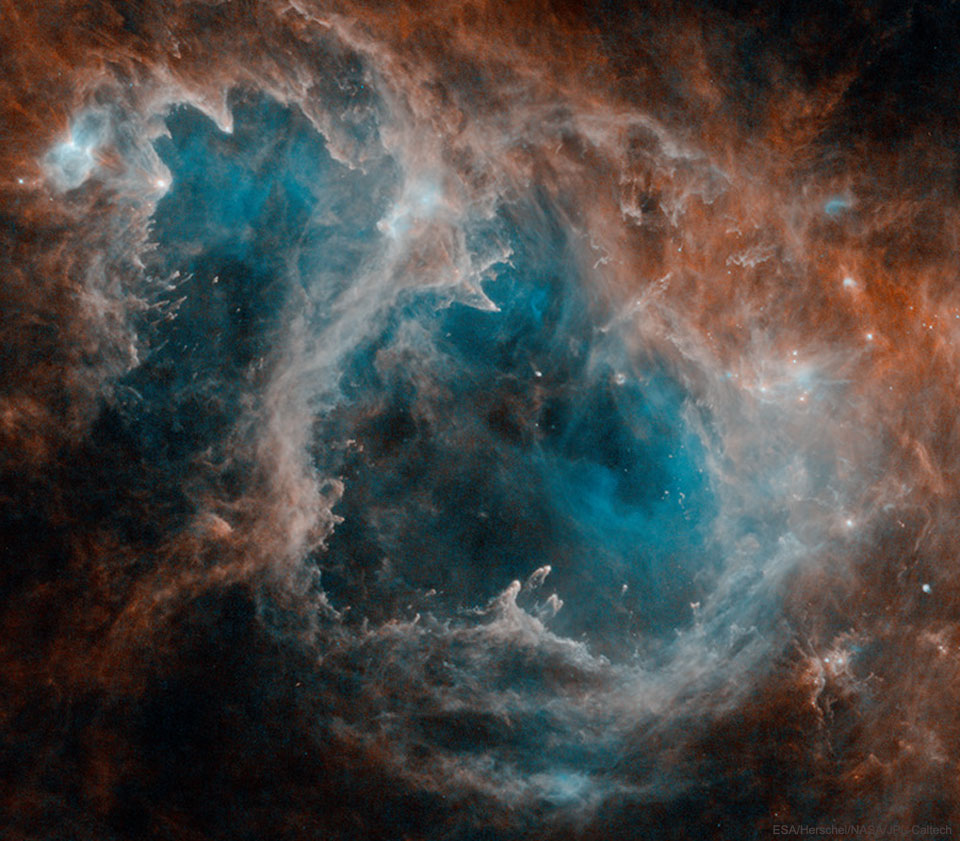

In [11]:
# Plotting a random NASA image

from IPython.display import Image
import numpy as np

im_file = Image(filename=images[np.random.randint(len(images))]) 
display(im_file)